Name	: Chaitanya More

Roll_no	:-	01	"B"

Batch	:-	TB1-B2

 #### Practical	no:-2

 Create	an	“Academic	performance”	dataset	of	students	and	perform	the	following	operations	using	Python.	transformation	should	be	one
 of	the	following	reasons:	to	change	the	scale	for	better
 
 1.Scan	all	variables	for	missing	values	and	inconsistencies.	If	there	are	missing	values	and/or	inconsistencies,	use	any	of	the	suitable
 techniques	to	deal	with	them.
 
 2.Scan	all	numeric	variables	for	outliers.	If	there	are	outliers,	use	any	of	the	suitable	techniques	to	deal	with	them.
 
 3.Apply	data	transformations	on	at	least	one	of	the	variables.	The	purpose	of	this
 understanding	of	the	variable,	to	convert	a	non-linear	relation	into	a	linear	one,	or	to	decrease	the	skewness	and	convert	the	distribution into	a	normal	distribution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
rollno = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
name = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", np.nan, np.nan, "k", "l", "m"]
marks = [40, 23, 50, 78, 48, 89, 90, 67, 84, 96, 76, np.nan, 97, np.nan, 65]
grade = ["F", "F", "P", "P", "P", "P", "P", "P", "P", "P", "P", "F", "P", np.nan, np.nan]

In [3]:
df = pd.DataFrame({"rollno" : rollno, "name" : name, "marks" : marks, "grade" : grade})

In [4]:
df

,rollno,name,marks,grade
0,1,a,40.0,F
1,2,b,23.0,F
2,3,c,50.0,P
3,4,d,78.0,P
4,5,e,48.0,P
5,6,f,89.0,P
6,7,g,90.0,P
7,8,h,67.0,P
8,9,i,84.0,P
9,10,j,96.0,P


In [5]:
df["marks"] = df["marks"].fillna(df["marks"].mean())

In [6]:

df

,rollno,name,marks,grade
0,1,a,40.000000,F
1,2,b,23.000000,F
2,3,c,50.000000,P
3,4,d,78.000000,P
4,5,e,48.000000,P
5,6,f,89.000000,P
6,7,g,90.000000,P
7,8,h,67.000000,P
8,9,i,84.000000,P
9,10,j,96.000000,P


In [7]:

def fun1(value):
    return int(math.floor(value))


In [8]:

df["marks"] = df["marks"].apply(fun1)
df = df[df['name'].notna()]

In [9]:

for index, row in df.iterrows():
    # print(row['marks'], row['grade'])
    if (row['marks'] > 40):
        df.loc[index, 'grade'] = 'P'
    else:
        df.loc[index, 'grade'] = 'F'

In [10]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P



#### Dataset Statistics

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rollno  13 non-null     int64 
 1   name    13 non-null     object
 2   marks   13 non-null     int64 
 3   grade   13 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [12]:
df.shape

(13, 4)

In [13]:
 df.dtypes

rollno     int64
name      object
marks      int64
grade     object
dtype: object

In [14]:
 df.isna().sum()

rollno    0
name      0
marks     0
grade     0
dtype: int64

In [15]:
 cols_with_na=[]
 for col in df.columns:
     if df[col].isna().any():
         cols_with_na.append(col)
cols_with_na

[]

In [16]:
for col in cols_with_na:
     col_dt =df[col].dtypes
     if	(col_dt == 'int64' or col_dt == 'float64'):
             outliers = (df[col] < 0) | (100 < df[col])
             df.loc[outliers, col] = np.nan
             df[col] = df[col].fillna(df[col].mean())
     else:
             df[col] = df[col].fillna(method='ffill')
df.head()

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

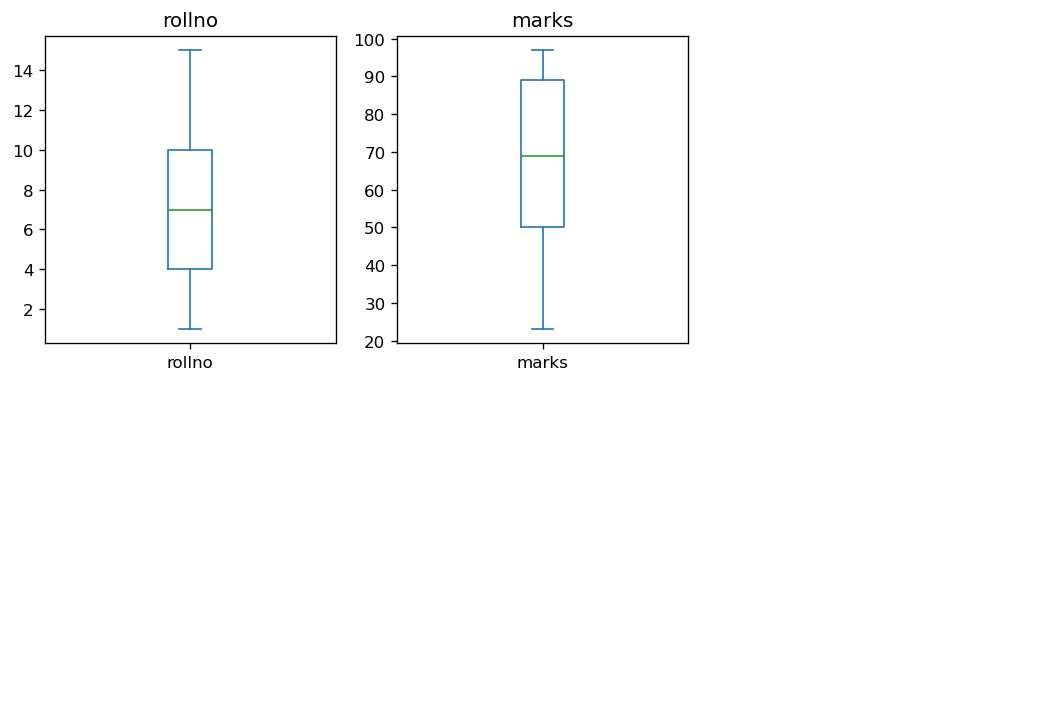

In [18]:
df_list= ['rollno' , 'marks' ]
fig, axes = plt.subplots(2, 3, figsize=(9,6), dpi=120)
for i,ax in enumerate(axes.flat):
    if i < len(df_list):
        df[df_list[i]].plot(kind='box', ax=ax)
        ax.set_title(df_list[i])
    else:
        ax.axis('off')
plt.tight_layout()	
plt.show()

In [19]:
Q1 = df['marks'].quantile(0.25)
Q3 = df['marks'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit =Q1 -1.5*IQR
Upper_limit	=Q3 +1.5*IQR
print(f'Q1= {Q1} ,Q3= {Q3} ,IQR= {IQR} , Lower_limit = {Lower_limit} , Upper_limit = {Upper_limit}')

Q1= 50.0 ,Q3= 89.0 ,IQR= 39.0 , Lower_limit = -8.5 , Upper_limit = 147.5


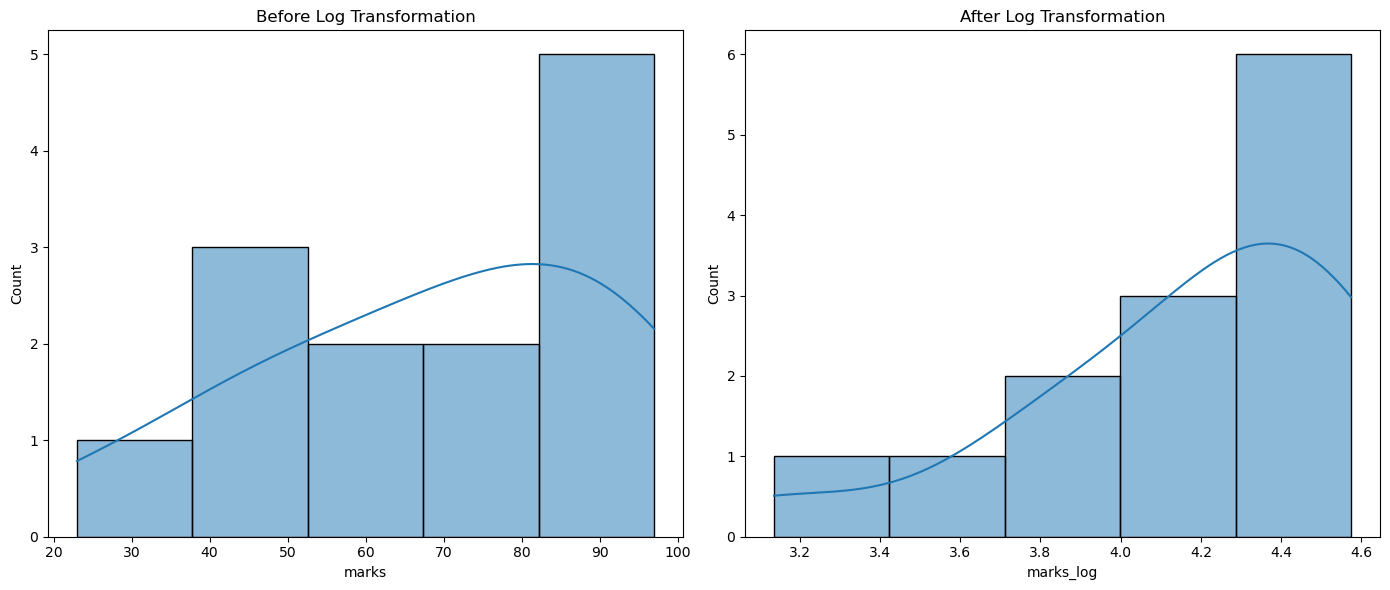

In [20]:
 df['marks_log']=np.log(df['marks'])
 fig,axes=	plt.subplots(1,	2,	figsize=(14,6)) 
 sns.histplot(data=df,	x="marks",	ax=axes[0],	kde=True)
 sns.histplot(data=df,	x="marks_log",	ax=axes[1],	kde=True)
 axes[0].set_title('Before Log Transformation')
 axes[1].set_title('After Log Transformation')
 plt.tight_layout()
 plt.show()

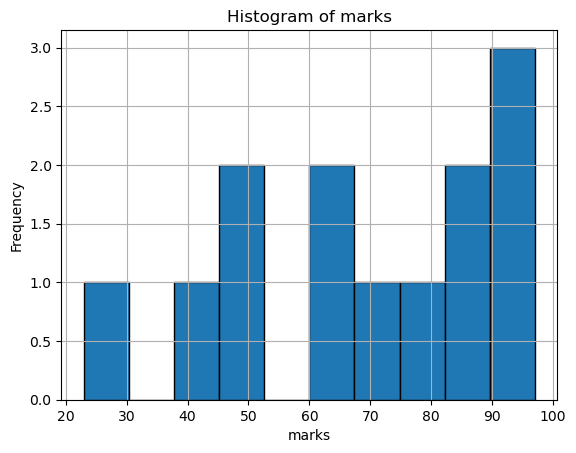

In [21]:
df['marks'].plot.hist(bins=10,	edgecolor='black')
plt.title('Histogram of marks')
plt.xlabel('marks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()